# **# FINAL OPTIMIZED XGBR MODEL RESULTS**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
x_test = pd.read_excel('/content/x_test.xlsx')


In [ ]:
y_train = pd.read_excel('/content/y_train.xlsx')


In [ ]:
y_test = pd.read_excel('/content/y_test.xlsx')


In [ ]:
x_train = pd.read_excel('/content/x_train.xlsx')
x_train

N_total  Mismatch  Avg at. wt.  avg s val e-  Pn s+p energy  \
0         12 -0.285714   132.286667      2.000000      -0.631228   
1          4  0.000000   121.792535      1.750000      -0.606327   
2          5 -0.333333    67.943600      2.000000      -0.631228   
3         12 -0.285714   161.360123      2.000000      -0.606327   
4         17 -0.111111   165.896645      2.000000      -0.606327   
..       ...       ...          ...           ...            ...   
179       24 -0.153846   138.033395      2.000000      -0.606327   
180        7  0.333333    78.468286      1.571429      -0.631228   
181        4  0.000000    75.667442      1.750000      -0.631228   
182        5 -0.333333   115.536000      2.000000      -0.631228   
183        7 -0.250000   162.222963      2.000000      -0.606327   

     chg s+p energy  Avg Pn-chg EN  Diff Pn-chg EN  Ionicity  Hybridisation  \
0         -0.747591       2.081818            6.50 -0.104000       2.109705   
1         -0.747591       2.073333            2.18 -0.560000       1.282051   
2         -0.892588       2.368000            3.64 -0.310000       2.631579   
3         -0.747591       2.070909            6.62 -0.144000       1.945525   
4         -0.867054       2.062353            2.74 -0.130000       2.000000   
..              ...            ...             ...       ...            ...   
179       -0.867054       2.425294           25.07 -0.304545       1.943463   
180       -0.867054       2.425000            5.60 -0.690000       0.894855   
181       -0.867054       2.383333            3.05 -0.905000       1.036269   
182       -0.747591       2.350000            3.55  0.173333       1.973684   
183       -0.747591       2.073333            4.36 -0.153333       1.910828   

     Ratio +3 Ph/-2 chg  avg ionic char  avg_polarizability(A^3)  \
0             81.421053        0.001299                 5.975000   
1              3.777778        0.052487                10.500000   
2             14.526316        0.016276                 4.380000   
3             52.888889        0.001609                 6.241667   
4            136.000000        0.000398                 6.394118   
..                  ...             ...                      ...   
179           88.000000        0.009176                 5.275000   
180            7.815789        0.022464                 5.442857   
181            5.210526        0.084539                 9.450000   
182           15.631579        0.008896                 5.600000   
183           15.111111        0.002302                 6.228571   

     range_Covalent_Radius  
0                 0.002600  
1                 0.006067  
2                 0.032400  
3                 0.002956  
4                 0.003025  
..                     ...  
179               0.020689  
180               0.010756  
181               0.024267  
182               0.009489  
183               0.002956  

[184 rows x 14 columns]

In [ ]:
regressor = xgb.XGBRegressor()
booster = ['gbtree', 'bglinear']
base_score = [-0.75, -0.50, -0.25,0,0.10,0.25,0.5,0.75,1, 1.25,1.35,1.45,1.50]
n_estimators = [100, 500, 900, 1100, 1500,2000,2200,2300,2400,2500,2600]
max_depth = [2,3,5,10,15,20,25]
booster = ['gbtree', 'bglinear']
learning_rate=[0.01,0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4,5,6,7,8,9,10]
cv = [1, 2, 3, 4, 5, 10]
verbose = [ 5, 10,15,20,25,50,60,70,80]
xgb_randomgrid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'booster': booster,
    'base_score': base_score,
    'cv': cv,
    'verbose': verbose
    }
from sklearn.model_selection import RandomizedSearchCV
randomcv_xgbr = RandomizedSearchCV(estimator=regressor,
                                   param_distributions=xgb_randomgrid,
                                   n_iter=100,
                                   scoring = 'neg_mean_absolute_error',
                                   n_jobs = 4, cv =3, verbose =5,
                                   return_train_score = True,
                                   random_state=13)

randomcv_xgbr.fit(x_train, y_train)
best_randomcv_xgb = randomcv_xgbr.best_estimator_
reg_xg = best_randomcv_xgb.fit(x_train,y_train)
pred_xgbr_randombest = best_randomcv_xgb.predict(x_test)
pred_xgbr_train = best_randomcv_xgb.predict(x_train)
xgbr_randombestTEST_rmse = sqrt(mean_squared_error(y_test, pred_xgbr_randombest))
xgbr_randombestTEST_mae = mean_absolute_error(y_test, pred_xgbr_randombest)
xgbr_randombestTRAIN_rmse = sqrt(mean_squared_error(y_train, pred_xgbr_train))
xgbr_randombestTRAIN_mae = mean_absolute_error(y_train, pred_xgbr_train)
print("Train RMSE:", xgbr_randombestTRAIN_rmse)
print("Train MAE", xgbr_randombestTRAIN_mae)
print("Test RMSE", xgbr_randombestTEST_rmse)
print("Test MAE", xgbr_randombestTEST_mae)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1090, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
 

Train RMSE: 0.06288845292466802
Train MAE 0.019066805428784826
Test RMSE 0.19722268021093783
Test MAE 0.13444341599619067


In [ ]:
x_test_split = pd.read_excel('/content/x_test_splliting.xlsx')


In [ ]:
y_test_split = pd.read_excel('/content/y_testcomp.xlsx')


In [ ]:
x_train.columns

Index(['N_total', 'Mismatch', 'Avg at. wt.', 'avg s val e-', 'Pn s+p energy',
       'chg s+p energy', 'Avg Pn-chg EN', 'Diff Pn-chg EN', 'Ionicity',
       'Hybridisation', 'Ratio +3 Ph/-2 chg', 'avg ionic char',
       'avg_polarizability(A^3)', 'range_Covalent_Radius'],
      dtype='object')

In [ ]:
x_test_split.columns

Index(['Composition', 'N_total', 'Mismatch', 'Avg at. wt.', 'avg s val e-',
       'Pn s+p energy', 'chg s+p energy', 'Avg Pn-chg EN', 'Diff Pn-chg EN',
       'Ionicity', 'Hybridisation', 'Ratio +3 Ph/-2 chg', 'avg ionic char',
       'avg_polarizability(A^3)', 'range_Covalent_Radius'],
      dtype='object')

In [ ]:
columns_to_drop = ['Composition']
x_test_split0 = x_test_split.drop(columns=columns_to_drop)

In [ ]:
pred_xgbr_x_test_split0= best_randomcv_xgb.predict(x_test_split0)
pred_xgbr_x_test_split0

array([0.29929572, 0.67005473, 0.7698625 , 0.87996614, 1.2864381 ,
       1.0989219 , 0.38984084, 0.37911782, 0.80992264, 0.5800032 ,
       1.2144301 , 1.0094354 , 0.29929572, 0.47781557, 0.7297419 ,
       0.75970405, 0.3499235 , 0.8947009 , 0.7299609 , 0.8085324 ,
       1.19979   , 0.97539926, 0.7546579 , 0.30666262, 0.5403828 ,
       0.50086254, 1.1490843 , 0.39065012, 1.2144301 , 0.4999863 ,
       0.6304102 , 0.51982945, 0.6496579 , 1.4200414 , 0.99097705,
       0.65130657, 1.0088414 , 0.99994546, 0.6411679 , 0.7481921 ,
       1.8252825 , 1.4002005 , 0.5204046 , 0.5500854 , 0.93005264,
       0.4992879 , 1.1006464 , 0.33090812, 0.6953515 , 1.000277  ,
       0.41856593, 0.33967274, 0.60913   , 1.2864381 , 0.830097  ,
       0.76204145], dtype=float32)

In [ ]:
arr = np.array([0.29929572, 0.67005473, 0.7698625 , 0.87996614, 1.2864381 ,
       1.0989219 , 0.38984084, 0.37911782, 0.80992264, 0.5800032 ,
       1.2144301 , 1.0094354 , 0.29929572, 0.47781557, 0.7297419 ,
       0.75970405, 0.3499235 , 0.8947009 , 0.7299609 , 0.8085324 ,
       1.19979   , 0.97539926, 0.7546579 , 0.30666262, 0.5403828 ,
       0.50086254, 1.1490843 , 0.39065012, 1.2144301 , 0.4999863 ,
       0.6304102 , 0.51982945, 0.6496579 , 1.4200414 , 0.99097705,
       0.65130657, 1.0088414 , 0.99994546, 0.6411679 , 0.7481921 ,
       1.8252825 , 1.4002005 , 0.5204046 , 0.5500854 , 0.93005264,
       0.4992879 , 1.1006464 , 0.33090812, 0.6953515 , 1.000277  ,
       0.41856593, 0.33967274, 0.60913   , 1.2864381 , 0.830097  ,
       0.76204145])
df = pd.DataFrame(arr)
df.to_excel('pred_xgbr_x_test_split0.xlsx', index=False)
excel_file_path = '/content/pred_xgbr_x_test_split0.xlsx'
print(f'DataFrame has been saved to {excel_file_path}')

DataFrame has been saved to /content/pred_xgbr_x_test_split0.xlsx


In [ ]:
xgbr_randombestTEST_rmse = sqrt(mean_squared_error(y_test_split, pred_xgbr_x_test_split0))
xgbr_randombestTEST_mae = mean_absolute_error(y_test_split, pred_xgbr_x_test_split0)
xgbr_randombestTRAIN_rmse = sqrt(mean_squared_error(y_train, pred_xgbr_train))
xgbr_randombestTRAIN_mae = mean_absolute_error(y_train, pred_xgbr_train)
print("Train RMSE:", xgbr_randombestTRAIN_rmse)
print("Train MAE", xgbr_randombestTRAIN_mae)
print("Test RMSE", xgbr_randombestTEST_rmse)
print("Test MAE", xgbr_randombestTEST_mae)

Train RMSE: 0.06288845292466802
Train MAE 0.019066805428784826
Test RMSE 0.10534906425843438
Test MAE 0.04385018940482821


In [ ]:
xg_r2_train = r2_score(y_train, pred_xgbr_train)
xg_r2_train

0.9676411604730843

In [ ]:
xg_r2_test = r2_score(y_test_split, pred_xgbr_x_test_split0)
xg_r2_test

0.9025965407187341

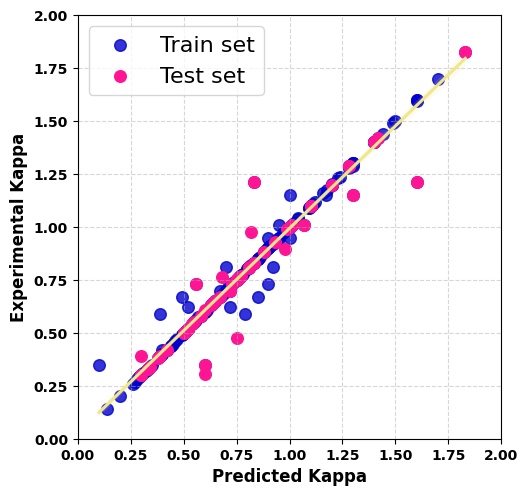

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))
plt.grid(True, linestyle='--', alpha=0.5)
sns.regplot(x=y_train, y=pred_xgbr_train, color='mediumblue', scatter_kws={'s': 70},
            line_kws={'color': 'khaki'}, label='Train set')
plt.scatter(y_test_split, pred_xgbr_x_test_split0, color='deeppink', s=70, label='Test set')
plt.xlabel('Predicted Kappa', fontsize=12, weight='bold')
plt.ylabel('Experimental Kappa', fontsize=12, weight='bold')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=16)
plt.show()

In [ ]:
x_train

N_total  Mismatch  Avg at. wt.  avg s val e-  Pn s+p energy  \
0         12 -0.285714   132.286667      2.000000      -0.631228   
1          4  0.000000   121.792535      1.750000      -0.606327   
2          5 -0.333333    67.943600      2.000000      -0.631228   
3         12 -0.285714   161.360123      2.000000      -0.606327   
4         17 -0.111111   165.896645      2.000000      -0.606327   
..       ...       ...          ...           ...            ...   
179       24 -0.153846   138.033395      2.000000      -0.606327   
180        7  0.333333    78.468286      1.571429      -0.631228   
181        4  0.000000    75.667442      1.750000      -0.631228   
182        5 -0.333333   115.536000      2.000000      -0.631228   
183        7 -0.250000   162.222963      2.000000      -0.606327   

     chg s+p energy  Avg Pn-chg EN  Diff Pn-chg EN  Ionicity  Hybridisation  \
0         -0.747591       2.081818            6.50 -0.104000       2.109705   
1         -0.747591       2.073333            2.18 -0.560000       1.282051   
2         -0.892588       2.368000            3.64 -0.310000       2.631579   
3         -0.747591       2.070909            6.62 -0.144000       1.945525   
4         -0.867054       2.062353            2.74 -0.130000       2.000000   
..              ...            ...             ...       ...            ...   
179       -0.867054       2.425294           25.07 -0.304545       1.943463   
180       -0.867054       2.425000            5.60 -0.690000       0.894855   
181       -0.867054       2.383333            3.05 -0.905000       1.036269   
182       -0.747591       2.350000            3.55  0.173333       1.973684   
183       -0.747591       2.073333            4.36 -0.153333       1.910828   

     Ratio +3 Ph/-2 chg  avg ionic char  avg_polarizability(A^3)  \
0             81.421053        0.001299                 5.975000   
1              3.777778        0.052487                10.500000   
2             14.526316        0.016276                 4.380000   
3             52.888889        0.001609                 6.241667   
4            136.000000        0.000398                 6.394118   
..                  ...             ...                      ...   
179           88.000000        0.009176                 5.275000   
180            7.815789        0.022464                 5.442857   
181            5.210526        0.084539                 9.450000   
182           15.631579        0.008896                 5.600000   
183           15.111111        0.002302                 6.228571   

     range_Covalent_Radius  
0                 0.002600  
1                 0.006067  
2                 0.032400  
3                 0.002956  
4                 0.003025  
..                     ...  
179               0.020689  
180               0.010756  
181               0.024267  
182               0.009489  
183               0.002956  

[184 rows x 14 columns]

In [ ]:
x_train.columns

Index(['N_total', 'Mismatch', 'Avg at. wt.', 'avg s val e-', 'Pn s+p energy',
       'chg s+p energy', 'Avg Pn-chg EN', 'Diff Pn-chg EN', 'Ionicity',
       'Hybridisation', 'Ratio +3 Ph/-2 chg', 'avg ionic char',
       'avg_polarizability(A^3)', 'range_Covalent_Radius'],
      dtype='object')

In [ ]:
#Predict

In [ ]:
Predict = pd.read_excel('/content/Predict.xlsx')
Predict

In [ ]:
columns_to_drop = ['Composition',  'avg p val e', 'pnictogen s energy', 'pnictogen p energy', 'chalcogen s energy',
       'chalcogen p energy']
Predict1 = Predict.drop(columns=columns_to_drop)

In [ ]:
pred_xgbr_predict = best_randomcv_xgb.predict(Predict1)
pred_xgbr_predict

array([0.14417905, 0.9499543 , 1.035356  , 1.035356  , 1.2219992 ,
       1.7006419 , 0.38629442, 0.8385306 , 1.1102132 , 1.1102132 ,
       0.69558024, 0.51385933, 1.1911553 , 1.2338002 , 1.0914245 ,
       1.1238511 , 1.1081686 , 1.0547675 , 0.94993603, 0.59965765,
       0.8383155 , 0.8328326 , 0.8224505 , 0.8224505 , 0.8224505 ,
       0.3006381 , 0.3006381 , 1.1765553 , 1.1765553 , 0.5809578 ,
       0.5809578 , 0.67005473, 0.4523542 , 0.5621888 , 0.7452138 ,
       0.7299821 , 0.80578774, 0.80578774, 0.44469002, 1.1943315 ,
       0.9898211 , 0.6168612 , 0.46294054, 1.1236274 , 1.1328826 ,
       1.1328826 , 0.98943615, 0.6882498 , 1.2165412 , 1.1917017 ,
       1.0528219 , 1.0422894 , 1.0422894 , 0.9566661 , 0.604056  ,
       0.604056  , 1.2853351 , 1.2482561 , 1.0224077 , 1.1367774 ,
       0.63959306, 0.50297034, 0.54828477, 0.4243471 , 0.6746706 ,
       1.016855  , 1.3150054 , 0.975662  , 1.4002005 , 0.8086772 ,
       0.97429645, 0.95758647, 0.66382515, 0.66382515, 0.89836